In [2]:
import pandas as pd

In [3]:
data =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vez/Concrete Compressive Strength.csv')

In [4]:
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [5]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
data.columns = data.columns.str.strip()
X, Y = data.drop(columns='Concrete compressive strength(MPa, megapascals)'), data['Concrete compressive strength(MPa, megapascals)']

In [8]:
from sklearn.preprocessing import MinMaxScaler


In [9]:
scaler = MinMaxScaler()

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(824, 8) (206, 8) (824,) (206,)


In [12]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
scaler.fit(Y_train.values.reshape(-1, 1))
Y_train = scaler.transform(Y_train.values.reshape(-1, 1))
Y_test = scaler.transform(Y_test.values.reshape(-1, 1))

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import keras
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [15]:
model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

In [16]:
model.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError()])

In [17]:
history = model.fit(X_train, Y_train, epochs=16, batch_size=8)

Epoch 1/16
103/103 [==============================] - 1s 1ms/step - loss: 0.0404 - mean_squared_error: 0.0404 - mean_absolute_error: 0.1568
Epoch 2/16
103/103 [==============================] - 0s 1ms/step - loss: 0.0188 - mean_squared_error: 0.0188 - mean_absolute_error: 0.1103
Epoch 3/16
103/103 [==============================] - 0s 1ms/step - loss: 0.0138 - mean_squared_error: 0.0138 - mean_absolute_error: 0.0916
Epoch 4/16
103/103 [==============================] - 0s 1ms/step - loss: 0.0119 - mean_squared_error: 0.0119 - mean_absolute_error: 0.0839
Epoch 5/16
103/103 [==============================] - 0s 1ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - mean_absolute_error: 0.0804
Epoch 6/16
103/103 [==============================] - 0s 1ms/step - loss: 0.0102 - mean_squared_error: 0.0102 - mean_absolute_error: 0.0777
Epoch 7/16
103/103 [==============================] - 0s 1ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - mean_absolute_error: 0.0755
Epoch 8/16
103/103 [

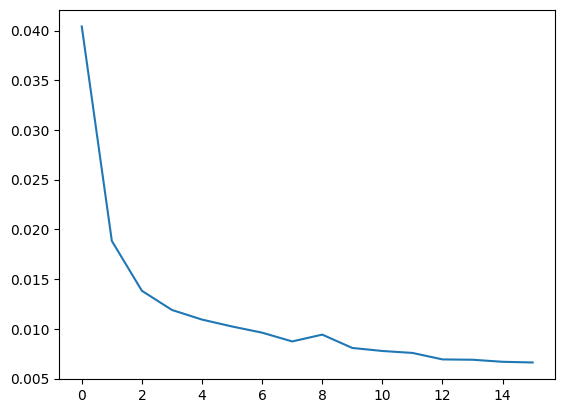

In [18]:

plt.plot(history.history['loss'])

In [19]:
preds = model.predict(X_test)

7/7 [==============================] - 0s 1ms/step


In [20]:
preds = scaler.inverse_transform(preds)

In [21]:
Y_test = scaler.inverse_transform(Y_test)

In [22]:
mean_squared_error(Y_test, preds), mean_absolute_error(Y_test, preds), r2_score(Y_test, preds)

(35.326311974399005, 4.6566607245920535, 0.8783526336073968)